In [1]:
import pandas as pd
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt

import mysql.connector as sql

##### Build the SQL connection:

In [2]:
db_connection = sql.connect(host='wcd-sql-class.c0h2bhc51r9d.us-east-1.rds.amazonaws.com', \
            database='credit', \
            user='student19', password='noisybutter764')

In [3]:
base = """
select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR

"""

In [4]:
base = pd.read_sql(base, con=db_connection)

In [5]:
base.shape

(307511, 150)

In [6]:
base2 = """
select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1
"""

In [7]:
base2 = pd.read_sql(base2, con=db_connection)

In [8]:
base2.shape

(92231, 9)

In [9]:
base3 = """
select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1
"""

In [10]:
base3 = pd.read_sql(base3, con=db_connection)

In [11]:
base3.shape

(338857, 4)

This step is to backup the SQL data pull result:

In [12]:
base.to_csv('base.csv', sep='|',index=False)
base2.to_csv('base2.csv', sep='|',index=False)
base3.to_csv('base3.csv', sep='|',index=False)

Load the data into Pandas DataFrames:

In [13]:
base=pd.read_csv('base.csv', sep='|')
base2=pd.read_csv('base2.csv', sep='|')
base3=pd.read_csv('base3.csv', sep='|')

# Join data

Left join data one by one:

In [14]:
result = pd.merge(base, base2, on='SK_ID_CURR', how='left')

In [15]:
result.shape

(307511, 158)

In [16]:
final = pd.merge(result, base3, on='SK_ID_CURR', how='left')

In [17]:
final.shape

(307511, 161)

In [18]:
final.to_csv('final.csv', index=False, sep='|')

In [19]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650


# Check Missing values

Define a Function to calculate missing values and missing rate by column:

In [20]:
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [21]:
missing_values_table(final)

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


Apply the function to our dataframe:

In [22]:
missing = missing_values_table(final)

Usually there are three options to deal with missing values:
 1. Imputation
 2. Create missing flag
 3. Drop columns with a high percentage of missing vlaues

We see there are a number of columns with a high percentage of missing values. 
There is no well-established threshold for removing missing values, 

and the best course of action depends on the problem. 

Here, to reduce the number of features, we will remove any columns that have greater than 10% missing rate (in real situations, the threshold can be 90%).


In [23]:
# find columns with missing > 10%
missing_columns = list(missing.index[missing['% of Total Values'] > 10])
missing_columns

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE

In [24]:
# drop these columns
final = final.drop(columns = missing_columns)

In [25]:
final.shape

(307511, 73)

In [26]:
# reapply this missing function
re_missing = missing_values_table(final)

In [27]:
re_missing

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
CNT_FAM_MEMBERS,2,0.000650
EXT_SOURCE_2,660,0.214626
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [28]:
final[list(re_missing.index)].dtypes

AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
CNT_FAM_MEMBERS                float64
EXT_SOURCE_2                   float64
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
NEW_CREDIT_TO_ANNUITY_RATIO    float64
NEW_CREDIT_TO_GOODS_RATIO      float64
NEW_ANNUITY_TO_INCOME_RATIO    float64
num_of_app                     float64
num_of_ref                     float64
avg_APP_CREDIT_PERC            float64
dtype: object

In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Deal with categorical variables

Most machine learning models unfortunately cannot deal with categorical variables

There are two main methods to deal with categorical variables:

1. **Label encoding**: assign each unique category in a categorical variable with an integer. 

2. **One-hot encoding**: create a new column for each unique category in a categorical variable. 
   Each observation receives a 1 in the column for its corresponding category and a 0 in all other new columns.

Let's first find all Cateorical columns:

In [30]:
categorical_columns = [col for col in final.columns if final[col].dtype == 'object']
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

Let's drop columns which is not very informative:

In [31]:
final = final.drop(columns=['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

Let's try One-hot encoding:

In [32]:
def cate_convert(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [33]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NEW_CREDIT_TO_ANNUITY_RATIO,NEW_CREDIT_TO_GOODS_RATIO,NEW_CREDIT_TO_INCOME_RATIO,NEW_ANNUITY_TO_INCOME_RATIO,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,1,16.461104,1.158397,2.007889,0.121978,1.0,0.0,1.000000
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,36.234085,1.145199,4.790750,0.132217,3.0,0.0,0.949329
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,20.000000,1.000000,2.000000,0.100000,1.0,0.0,1.207699
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,10.532818,1.052803,2.316167,0.219900,5.0,1.0,1.061032
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,23.461618,1.000000,4.222222,0.179963,6.0,0.0,0.969650


In [34]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [35]:
final,cat_cols = cate_convert(final, nan_as_category = True)

In [36]:
missing_values_table(final)

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
CNT_FAM_MEMBERS,2,0.000650
EXT_SOURCE_2,660,0.214626
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DAYS_LAST_PHONE_CHANGE,1,0.000325
NEW_CREDIT_TO_ANNUITY_RATIO,12,0.003902


Missing imputation:

In [37]:
re_missing = missing_values_table(final)

In [38]:
list(re_missing.index)

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'NEW_CREDIT_TO_ANNUITY_RATIO',
 'NEW_CREDIT_TO_GOODS_RATIO',
 'NEW_ANNUITY_TO_INCOME_RATIO',
 'num_of_app',
 'num_of_ref',
 'avg_APP_CREDIT_PERC']

In [39]:
for i in list(re_missing.index):
    final[i].fillna(value=0, inplace=True)

In [40]:
missing_values_table(final)

,Missing Values,% of Total Values


Create a backup file before model build:

In [41]:
final.to_csv('final_model.csv', index=False, sep='|')

# Train/Test Split

Define the target variable (dependent variable) as y:

In [42]:
y = final['TARGET']

In [43]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [44]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(final, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(246008, 94)
(246008,)
(61503, 94)
(61503,)


Drop the target variables from X_train and X_test:

In [45]:
X_test = X_test.drop(columns = ['TARGET'])

In [46]:
X_train = X_train.drop(columns = ['TARGET'])

# Logistic Regression Implementation

Get all the features:

In [47]:
features = list(X_train.columns)
features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',


Use LogisticRegression from Scikit-Learn for our first model:

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

Train on the training data:

In [49]:
log_reg.fit(X_train, y_train)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Make the prediction:

Now that the model has been trained, we can use it to make predictions. 

We want to predict the probabilities of not paying a loan, so we use the model **predict_proba** method.

The first column is the probability of the target being 0 and the second column is the probability of the target being 1.

In [50]:
log_reg_pred = log_reg.predict_proba(X_test)
log_reg_pred

array([[0.93677695, 0.06322305],
       [0.87870478, 0.12129522],
       [0.88551632, 0.11448368],
       ...,
       [0.9456753 , 0.0543247 ],
       [0.92911022, 0.07088978],
       [0.95538503, 0.04461497]])

In [51]:
y_pred_proba=log_reg_pred[:,1]
y_pred_proba

array([0.06322305, 0.12129522, 0.11448368, ..., 0.0543247 , 0.07088978,
       0.04461497])

Predict the label:

**.predict()** is for predicting class labels.
   
Sci-Kit learn is using a threshold of P>0.5 for binary classifications.

In [52]:
y_pred = log_reg.predict(X_test)

## Check key model metrics

An **ROC** curve is a plot of True Positive Rate vs False Positive Rate where False Positive Rate=FP/(TN+FP) =1-Specificity.

The ROC curve shows how true positive rates and false positive rates change at different thresholds. The **AUC** is simply the total area under the ROC curve. The AUC ranges from 0 to 1 and a higher AUC number suggests better model performance.

A random classifier has an AUC of 0.5, so any classifier with an AUC higher than 0.5 suggests that the model performs better than random predictions.

Show the ROC_CURVE to evaluate the model performance:

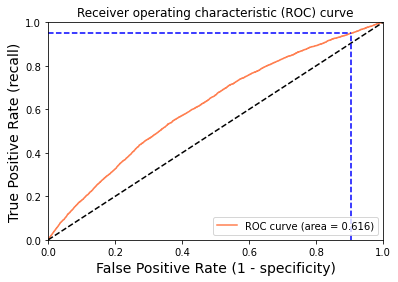

In [53]:
# Show the ROC_CURVE
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred_proba=log_reg_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Implementation 

**Ensemble learning**, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance)
Two most popular ensemble methods are bagging and boosting.

**Bagging**: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data => bootstrapping the data plus using the aggregate to make a decision is called bagging!

- **Random forest** is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

**Boosting**: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model

- **Gradient Boosting**: GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree. GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.

Create a random forest classifier:

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

Train the model:

In [56]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

Make the prediction:

In [57]:
rf_model_pred = rf_model.predict_proba(X_test)
y_pred_proba = rf_model_pred[:,1]
y_pred_proba

array([0.07270603, 0.07675284, 0.08269917, ..., 0.06682413, 0.09838735,
       0.06773614])

Predict the label:

In [58]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Show the ROC_CURVE to evaluate the model performance:

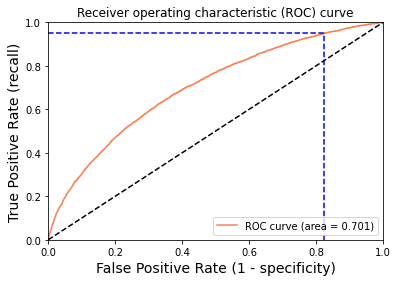

In [59]:
import numpy as np
y_pred_proba = rf_model_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

As you can see the advanced Machine Learning can have a much better performance than the traddional model